<a href="https://colab.research.google.com/github/dantidn/sentiment-analysis-google-play-review/blob/main/sentiment_analysis_google_play_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [ ]:
from google.colab import drive
import os

# Mount Drive
drive.mount('/content/drive')

# Path target di Google Drive
target_path = '/content/drive/Othercomputers/LAPTOP ASUS VIVOBOOK/Sistem Informasi/SEM 8/sentiment analysis_google play reviews'
link_path = '/content/gdrive'

# Cek apakah folder target ada
if not os.path.exists(target_path):
    raise Exception(f"❌ Folder target tidak ditemukan: {target_path}")

# Hapus /content/gdrive jika sudah ada tapi bukan symbolic link
if os.path.exists(link_path) and not os.path.islink(link_path):
    os.rmdir(link_path)

# Buat symlink jika belum ada
if not os.path.exists(link_path):
    os.symlink(target_path, link_path)
    print(f"✅ Symlink dibuat: {link_path} → {target_path}")
else:
    print(f"🔁 Symlink sudah ada: {link_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔁 Symlink sudah ada: /content/gdrive


# Import Library

In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.7 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import reviews, Sort
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scraping Data

In [ ]:
# Daftar app ID dan nama
apps = {
    'com.alfamart.alfagift': 'Alfagift',
    'com.indomaret.klikindomaret': 'Klik Indomaret'
}

# Rentang waktu
start_date = datetime(2024, 7, 1)
end_date = datetime(2024, 12, 31)

# Fungsi ambil dan filter review
def get_reviews_filtered(app_id, app_name):
    all_reviews = []
    token = None

    while True:
        result, token = reviews(
            app_id,
            lang='id',
            country='id',
            sort=Sort.NEWEST,
            count=200,
            continuation_token=token
        )

        for r in result:
            review_date = r['at']
            if start_date <= review_date <= end_date:
                all_reviews.append({
                    'App': app_name,
                    'Review ID': r['reviewId'],
                    'Username': r['userName'],
                    'Rating': r['score'],
                    'Review Text': r['content'],
                    'Date': review_date
                })
            elif review_date < start_date:
                return all_reviews

        if token is None:
            break

    return all_reviews

# Ambil data dari semua aplikasi
all_data = []
for app_id, app_name in apps.items():
    print(f"Mengambil review untuk: {app_name}")
    app_reviews = get_reviews_filtered(app_id, app_name)
    all_data.extend(app_reviews)
    print(f"Jumlah review tersimpan: {len(app_reviews)}\n")

# Simpan file ke /content/gdrive
df = pd.DataFrame(all_data)

# Filter: hanya ambil review dengan isi teks
df = df[df['Review Text'].notnull() & (df['Review Text'].str.strip() != '')]

print(f"Jumlah review dengan teks: {len(df)}")

output_file = '/content/gdrive/review_juli_des_2024.csv'
df.to_csv(output_file, index=False, encoding='utf-8')
print(f"✅ File berhasil disimpan di: {output_file}")

# Baca kembali untuk konfirmasi
data = pd.read_csv(output_file)
data.info()
data.head(20)

Mengambil review untuk: Alfagift
Jumlah review tersimpan: 19206

Mengambil review untuk: Klik Indomaret
Jumlah review tersimpan: 5147

Jumlah review dengan teks: 24353
✅ File berhasil disimpan di: /content/gdrive/review_juli_des_2024.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   App          24353 non-null  object
 1   Review ID    24353 non-null  object
 2   Username     24353 non-null  object
 3   Rating       24353 non-null  int64 
 4   Review Text  24353 non-null  object
 5   Date         24353 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


,App,Review ID,Username,Rating,Review Text,Date
0,Alfagift,c15aa132-6f24-4577-9ad6-f9d41794fa96,Devid Permana,1,"Sudah di dm, ujungnya tetap di suruh hubungi c...",2024-12-30 20:47:38
1,Alfagift,950fa2e5-eabd-4b31-bb55-13ae07e6d2f6,Ismi Nur,5,Aku kasih bintang 5 untuk aplikasi Alfagift in...,2024-12-30 16:46:20
2,Alfagift,692a3656-f0b4-4318-ad6e-30c21d58838a,Zhio Lusi,5,"Aku kasih bintang 5 untuk aplikasi Alfagift, k...",2024-12-30 15:00:10
3,Alfagift,7f96973f-c948-455f-9991-77b89f8761a3,Ida Farida,4,"Sebenarnya saya suka belanja pake alfagift, ta...",2024-12-30 13:49:20
4,Alfagift,50ca1cfb-e8a7-4957-bc77-c7d4e8f0e5fa,Song Jimin,1,Udah ganti password tetep ga bisa masuk ga jelas,2024-12-30 13:06:12
5,Alfagift,98d1e391-aa77-4748-8d81-9378372b0540,Warga 62,1,"Tiba² logout sendiri, gk bisa login kembali, d...",2024-12-30 12:52:02
6,Alfagift,ad159ffb-ebdf-4e42-9677-f800400c1a8b,Aguez_ Arzank,5,"Keren,belanja masa kini tanpa ribet",2024-12-30 12:43:16
7,Alfagift,b6401c73-2a16-4d1b-a1f3-f5ddc3a60d04,Suyati Syt,5,Gara2 ada alfagift jd lebih mudah jadi langgan...,2024-12-30 12:43:10
8,Alfagift,c5eb10f8-4e29-4189-affc-49b640988d12,roomen mey,1,Aplikasinya sering error. Login selalu error d...,2024-12-30 11:33:51
9,Alfagift,c9483cc7-343e-43cb-a47b-bb28fe373910,sasongko bambang,1,"Lucu kali, cod minimal 50k. Sedangkan di aplik...",2024-12-30 10:49:43


# Pre-processing Data


In [ ]:
df = pd.DataFrame({
    'App': data['App'],
    'Review Text': data['Review Text']
})
df.head(5)

,App,Review Text
0,Alfagift,"Sudah di dm, ujungnya tetap di suruh hubungi c..."
1,Alfagift,Aku kasih bintang 5 untuk aplikasi Alfagift in...
2,Alfagift,"Aku kasih bintang 5 untuk aplikasi Alfagift, k..."
3,Alfagift,"Sebenarnya saya suka belanja pake alfagift, ta..."
4,Alfagift,Udah ganti password tetep ga bisa masuk ga jelas


Data Cleaning

In [ ]:
import re
import string
import nltk

def remove_URL(tweet):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', tweet)

def remove_html(tweet):
  html = re.compile(r'<.*?')
  return html.sub(r'', tweet)

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)
def remove_number(tweet):
  tweet = re.sub(r'\d+','',tweet)
  return tweet

def remove_symbols(tweet):
  tweet = re.sub(r'[^a-zA-Z0-9\s]','', tweet)
  return tweet

df['cleansing']=df['Review Text'].apply(lambda x: remove_URL(x))
df['cleansing']=df['cleansing'].apply(lambda x: remove_html(x))
df['cleansing']=df['cleansing'].apply(lambda x: remove_emoji(x))
df['cleansing']=df['cleansing'].apply(lambda x: remove_number(x))
df['cleansing']=df['cleansing'].apply(lambda x: remove_symbols(x))

df.head(10)

,App,Review Text,cleansing
0,Alfagift,"Sudah di dm, ujungnya tetap di suruh hubungi c...",Sudah di dm ujungnya tetap di suruh hubungi cs...
1,Alfagift,Aku kasih bintang 5 untuk aplikasi Alfagift in...,Aku kasih bintang untuk aplikasi Alfagift ini...
2,Alfagift,"Aku kasih bintang 5 untuk aplikasi Alfagift, k...",Aku kasih bintang untuk aplikasi Alfagift kar...
3,Alfagift,"Sebenarnya saya suka belanja pake alfagift, ta...",Sebenarnya saya suka belanja pake alfagift tap...
4,Alfagift,Udah ganti password tetep ga bisa masuk ga jelas,Udah ganti password tetep ga bisa masuk ga jelas
5,Alfagift,"Tiba² logout sendiri, gk bisa login kembali, d...",Tiba logout sendiri gk bisa login kembali dah ...
6,Alfagift,"Keren,belanja masa kini tanpa ribet",Kerenbelanja masa kini tanpa ribet
7,Alfagift,Gara2 ada alfagift jd lebih mudah jadi langgan...,Gara ada alfagift jd lebih mudah jadi langgana...
8,Alfagift,Aplikasinya sering error. Login selalu error d...,Aplikasinya sering error Login selalu error di...
9,Alfagift,"Lucu kali, cod minimal 50k. Sedangkan di aplik...",Lucu kali cod minimal k Sedangkan di aplikasi ...


Case Folding

In [ ]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text
df['case_folding']=df['cleansing'].apply(case_folding)

df.head(10)

,App,Review Text,cleansing,case_folding
0,Alfagift,"Sudah di dm, ujungnya tetap di suruh hubungi c...",Sudah di dm ujungnya tetap di suruh hubungi cs...,sudah di dm ujungnya tetap di suruh hubungi cs...
1,Alfagift,Aku kasih bintang 5 untuk aplikasi Alfagift in...,Aku kasih bintang untuk aplikasi Alfagift ini...,aku kasih bintang untuk aplikasi alfagift ini...
2,Alfagift,"Aku kasih bintang 5 untuk aplikasi Alfagift, k...",Aku kasih bintang untuk aplikasi Alfagift kar...,aku kasih bintang untuk aplikasi alfagift kar...
3,Alfagift,"Sebenarnya saya suka belanja pake alfagift, ta...",Sebenarnya saya suka belanja pake alfagift tap...,sebenarnya saya suka belanja pake alfagift tap...
4,Alfagift,Udah ganti password tetep ga bisa masuk ga jelas,Udah ganti password tetep ga bisa masuk ga jelas,udah ganti password tetep ga bisa masuk ga jelas
5,Alfagift,"Tiba² logout sendiri, gk bisa login kembali, d...",Tiba logout sendiri gk bisa login kembali dah ...,tiba logout sendiri gk bisa login kembali dah ...
6,Alfagift,"Keren,belanja masa kini tanpa ribet",Kerenbelanja masa kini tanpa ribet,kerenbelanja masa kini tanpa ribet
7,Alfagift,Gara2 ada alfagift jd lebih mudah jadi langgan...,Gara ada alfagift jd lebih mudah jadi langgana...,gara ada alfagift jd lebih mudah jadi langgana...
8,Alfagift,Aplikasinya sering error. Login selalu error d...,Aplikasinya sering error Login selalu error di...,aplikasinya sering error login selalu error di...
9,Alfagift,"Lucu kali, cod minimal 50k. Sedangkan di aplik...",Lucu kali cod minimal k Sedangkan di aplikasi ...,lucu kali cod minimal k sedangkan di aplikasi ...


Tokenization

In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['case_folding'].apply(tokenize)

df.head(10)

,App,Review Text,cleansing,case_folding,tokenize
0,Alfagift,"Sudah di dm, ujungnya tetap di suruh hubungi c...",Sudah di dm ujungnya tetap di suruh hubungi cs...,sudah di dm ujungnya tetap di suruh hubungi cs...,"[sudah, di, dm, ujungnya, tetap, di, suruh, hu..."
1,Alfagift,Aku kasih bintang 5 untuk aplikasi Alfagift in...,Aku kasih bintang untuk aplikasi Alfagift ini...,aku kasih bintang untuk aplikasi alfagift ini...,"[aku, kasih, bintang, untuk, aplikasi, alfagif..."
2,Alfagift,"Aku kasih bintang 5 untuk aplikasi Alfagift, k...",Aku kasih bintang untuk aplikasi Alfagift kar...,aku kasih bintang untuk aplikasi alfagift kar...,"[aku, kasih, bintang, untuk, aplikasi, alfagif..."
3,Alfagift,"Sebenarnya saya suka belanja pake alfagift, ta...",Sebenarnya saya suka belanja pake alfagift tap...,sebenarnya saya suka belanja pake alfagift tap...,"[sebenarnya, saya, suka, belanja, pake, alfagi..."
4,Alfagift,Udah ganti password tetep ga bisa masuk ga jelas,Udah ganti password tetep ga bisa masuk ga jelas,udah ganti password tetep ga bisa masuk ga jelas,"[udah, ganti, password, tetep, ga, bisa, masuk..."
5,Alfagift,"Tiba² logout sendiri, gk bisa login kembali, d...",Tiba logout sendiri gk bisa login kembali dah ...,tiba logout sendiri gk bisa login kembali dah ...,"[tiba, logout, sendiri, gk, bisa, login, kemba..."
6,Alfagift,"Keren,belanja masa kini tanpa ribet",Kerenbelanja masa kini tanpa ribet,kerenbelanja masa kini tanpa ribet,"[kerenbelanja, masa, kini, tanpa, ribet]"
7,Alfagift,Gara2 ada alfagift jd lebih mudah jadi langgan...,Gara ada alfagift jd lebih mudah jadi langgana...,gara ada alfagift jd lebih mudah jadi langgana...,"[gara, ada, alfagift, jd, lebih, mudah, jadi, ..."
8,Alfagift,Aplikasinya sering error. Login selalu error d...,Aplikasinya sering error Login selalu error di...,aplikasinya sering error login selalu error di...,"[aplikasinya, sering, error, login, selalu, er..."
9,Alfagift,"Lucu kali, cod minimal 50k. Sedangkan di aplik...",Lucu kali cod minimal k Sedangkan di aplikasi ...,lucu kali cod minimal k sedangkan di aplikasi ...,"[lucu, kali, cod, minimal, k, sedangkan, di, a..."


Filtering / Stopword Removal

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['filtering/stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,App,Review Text,cleansing,case_folding,tokenize,filtering/stopword removal
0,Alfagift,"Sudah di dm, ujungnya tetap di suruh hubungi c...",Sudah di dm ujungnya tetap di suruh hubungi cs...,sudah di dm ujungnya tetap di suruh hubungi cs...,"[sudah, di, dm, ujungnya, tetap, di, suruh, hu...","[dm, ujungnya, suruh, hubungi, cs, via, email,..."
1,Alfagift,Aku kasih bintang 5 untuk aplikasi Alfagift in...,Aku kasih bintang untuk aplikasi Alfagift ini...,aku kasih bintang untuk aplikasi alfagift ini...,"[aku, kasih, bintang, untuk, aplikasi, alfagif...","[kasih, bintang, aplikasi, alfagift, karna, ba..."
2,Alfagift,"Aku kasih bintang 5 untuk aplikasi Alfagift, k...",Aku kasih bintang untuk aplikasi Alfagift kar...,aku kasih bintang untuk aplikasi alfagift kar...,"[aku, kasih, bintang, untuk, aplikasi, alfagif...","[kasih, bintang, aplikasi, alfagift, belanja, ..."
3,Alfagift,"Sebenarnya saya suka belanja pake alfagift, ta...",Sebenarnya saya suka belanja pake alfagift tap...,sebenarnya saya suka belanja pake alfagift tap...,"[sebenarnya, saya, suka, belanja, pake, alfagi...","[suka, belanja, pake, alfagift, karna, dibuka,..."
4,Alfagift,Udah ganti password tetep ga bisa masuk ga jelas,Udah ganti password tetep ga bisa masuk ga jelas,udah ganti password tetep ga bisa masuk ga jelas,"[udah, ganti, password, tetep, ga, bisa, masuk...","[udah, ganti, password, tetep, ga, masuk, ga]"
5,Alfagift,"Tiba² logout sendiri, gk bisa login kembali, d...",Tiba logout sendiri gk bisa login kembali dah ...,tiba logout sendiri gk bisa login kembali dah ...,"[tiba, logout, sendiri, gk, bisa, login, kemba...","[logout, gk, login, dah, report, email, tpi, g..."
6,Alfagift,"Keren,belanja masa kini tanpa ribet",Kerenbelanja masa kini tanpa ribet,kerenbelanja masa kini tanpa ribet,"[kerenbelanja, masa, kini, tanpa, ribet]","[kerenbelanja, ribet]"
7,Alfagift,Gara2 ada alfagift jd lebih mudah jadi langgan...,Gara ada alfagift jd lebih mudah jadi langgana...,gara ada alfagift jd lebih mudah jadi langgana...,"[gara, ada, alfagift, jd, lebih, mudah, jadi, ...","[gara, alfagift, jd, mudah, langganan, alfaseb..."
8,Alfagift,Aplikasinya sering error. Login selalu error d...,Aplikasinya sering error Login selalu error di...,aplikasinya sering error login selalu error di...,"[aplikasinya, sering, error, login, selalu, er...","[aplikasinya, error, login, error, pake, devic..."
9,Alfagift,"Lucu kali, cod minimal 50k. Sedangkan di aplik...",Lucu kali cod minimal k Sedangkan di aplikasi ...,lucu kali cod minimal k sedangkan di aplikasi ...,"[lucu, kali, cod, minimal, k, sedangkan, di, a...","[lucu, kali, cod, minimal, k, aplikasi, toko, ..."


Stemming

In [ ]:
!pip install sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming_data']= df['filtering/stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

output_path = '/content/gdrive/Hasil-preprocessing-data.csv'
df.to_csv(output_path, encoding='utf-8', index=False)

print(f"✅ File berhasil disimpan di: {output_path}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.2 MB/s eta 0:00:00
✅ File berhasil disimpan di: /content/gdrive/Hasil-preprocessing-data.csv


In [ ]:
df.head(10)

,App,Review Text,cleansing,case_folding,tokenize,filtering/stopword removal,stemming_data
0,Alfagift,"Sudah di dm, ujungnya tetap di suruh hubungi c...",Sudah di dm ujungnya tetap di suruh hubungi cs...,sudah di dm ujungnya tetap di suruh hubungi cs...,"[sudah, di, dm, ujungnya, tetap, di, suruh, hu...","[dm, ujungnya, suruh, hubungi, cs, via, email,...",dm ujung suruh hubung cs via email telp jawaba...
1,Alfagift,Aku kasih bintang 5 untuk aplikasi Alfagift in...,Aku kasih bintang untuk aplikasi Alfagift ini...,aku kasih bintang untuk aplikasi alfagift ini...,"[aku, kasih, bintang, untuk, aplikasi, alfagif...","[kasih, bintang, aplikasi, alfagift, karna, ba...",kasih bintang aplikasi alfagift karna banget p...
2,Alfagift,"Aku kasih bintang 5 untuk aplikasi Alfagift, k...",Aku kasih bintang untuk aplikasi Alfagift kar...,aku kasih bintang untuk aplikasi alfagift kar...,"[aku, kasih, bintang, untuk, aplikasi, alfagif...","[kasih, bintang, aplikasi, alfagift, belanja, ...",kasih bintang aplikasi alfagift belanja untung...
3,Alfagift,"Sebenarnya saya suka belanja pake alfagift, ta...",Sebenarnya saya suka belanja pake alfagift tap...,sebenarnya saya suka belanja pake alfagift tap...,"[sebenarnya, saya, suka, belanja, pake, alfagi...","[suka, belanja, pake, alfagift, karna, dibuka,...",suka belanja pake alfagift karna buka buka sya...
4,Alfagift,Udah ganti password tetep ga bisa masuk ga jelas,Udah ganti password tetep ga bisa masuk ga jelas,udah ganti password tetep ga bisa masuk ga jelas,"[udah, ganti, password, tetep, ga, bisa, masuk...","[udah, ganti, password, tetep, ga, masuk, ga]",udah ganti password tetep ga masuk ga
5,Alfagift,"Tiba² logout sendiri, gk bisa login kembali, d...",Tiba logout sendiri gk bisa login kembali dah ...,tiba logout sendiri gk bisa login kembali dah ...,"[tiba, logout, sendiri, gk, bisa, login, kemba...","[logout, gk, login, dah, report, email, tpi, g...",logout gk login dah report email tpi gada feed...
6,Alfagift,"Keren,belanja masa kini tanpa ribet",Kerenbelanja masa kini tanpa ribet,kerenbelanja masa kini tanpa ribet,"[kerenbelanja, masa, kini, tanpa, ribet]","[kerenbelanja, ribet]",kerenbelanja ribet
7,Alfagift,Gara2 ada alfagift jd lebih mudah jadi langgan...,Gara ada alfagift jd lebih mudah jadi langgana...,gara ada alfagift jd lebih mudah jadi langgana...,"[gara, ada, alfagift, jd, lebih, mudah, jadi, ...","[gara, alfagift, jd, mudah, langganan, alfaseb...",gara alfagift jd mudah langgan alfasebelumnya ...
8,Alfagift,Aplikasinya sering error. Login selalu error d...,Aplikasinya sering error Login selalu error di...,aplikasinya sering error login selalu error di...,"[aplikasinya, sering, error, login, selalu, er...","[aplikasinya, error, login, error, pake, devic...",aplikasi error login error pake device beda
9,Alfagift,"Lucu kali, cod minimal 50k. Sedangkan di aplik...",Lucu kali cod minimal k Sedangkan di aplikasi ...,lucu kali cod minimal k sedangkan di aplikasi ...,"[lucu, kali, cod, minimal, k, sedangkan, di, a...","[lucu, kali, cod, minimal, k, aplikasi, toko, ...",lucu kali cod minimal k aplikasi toko belah ga...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24353 entries, 0 to 24352
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   App                         24353 non-null  object
 1   Review Text                 24353 non-null  object
 2   cleansing                   24353 non-null  object
 3   case_folding                24353 non-null  object
 4   tokenize                    24353 non-null  object
 5   filtering/stopword removal  24353 non-null  object
 6   stemming_data               24353 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


# Labeling Data

In [ ]:
!pip install pandas transformers torch --quiet

In [ ]:
#=== Labeling Per Aplikasi ===
from transformers import pipeline
import os
import pandas as pd

# Load sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# Ambil daftar aplikasi unik
apps = df['App'].unique()

# Folder simpan output
output_dir = '/content/gdrive'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List untuk menampung semua data hasil labeling
labeled_dfs = []

for app in apps:
    print(f"🔍 Memproses aplikasi: {app}")
    app_df = df[df['App'] == app].copy()

    # Filter data kosong
    app_df = app_df[app_df['stemming_data'].astype(str).str.strip() != '']

    labels = []
    for text in app_df['stemming_data'].astype(str):
        result = sentiment_analysis(text)[0]
        label = result['label'].lower()

        if label == 'negative':
            labels.append('negatif')
        elif label == 'neutral':
            labels.append('netral')
        else:
            labels.append('positif')

    # Tambahkan hasil ke DataFrame
    app_df['sentiment'] = labels

    # Simpan hasil per aplikasi
    filename = f"Hasil-labeling-{app.replace(' ', '_')}.csv"
    output_file = os.path.join(output_dir, filename)
    app_df.to_csv(output_file, index=False, encoding='utf-8')
    print(f"✅ Disimpan: {output_file}")

    labeled_dfs.append(app_df)

# Gabungkan semua untuk visualisasi
all_labeled_data = pd.concat(labeled_dfs, ignore_index=True)

Device set to use cpu


🔍 Memproses aplikasi: Alfagift
✅ Disimpan: /content/gdrive/Hasil-labeling-Alfagift.csv
🔍 Memproses aplikasi: Klik Indomaret
✅ Disimpan: /content/gdrive/Hasil-labeling-Klik_Indomaret.csv


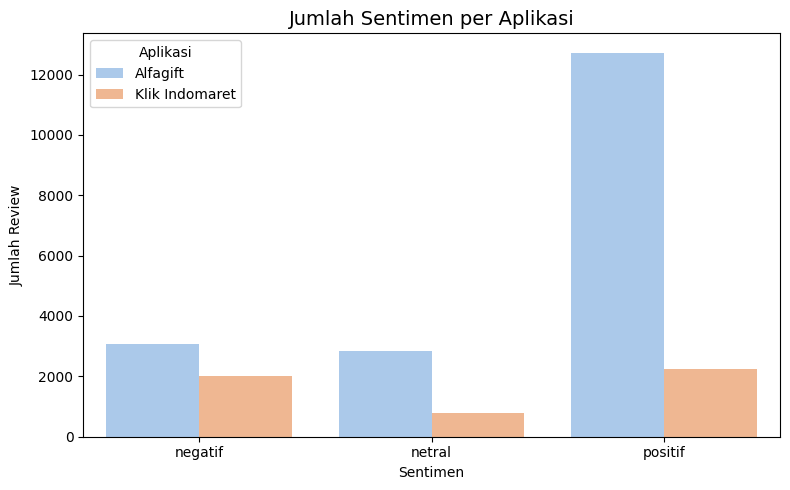

<ipython-input-24-7d62d7ade134>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='Set2')


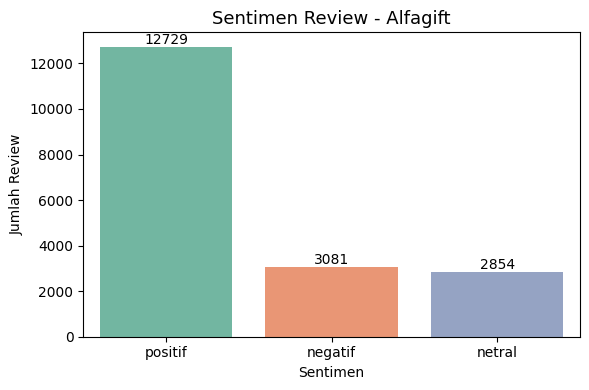

<ipython-input-24-7d62d7ade134>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='Set2')


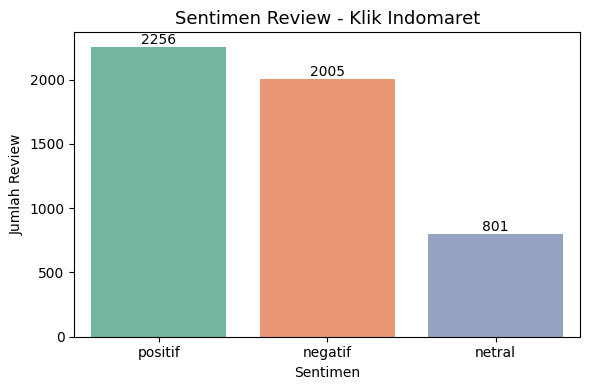

📁 File gabungan disimpan di: /content/gdrive/Hasil-labeling-semua-aplikasi.csv


In [ ]:
#=== Visualisasi: Satu Grafik Gabungan (Perbandingan per App) ====
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah per app dan sentimen
sentiment_app = all_labeled_data.groupby(['App', 'sentiment']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
sns.barplot(data=sentiment_app, x='sentiment', y='count', hue='App', palette='pastel')
plt.title('Jumlah Sentimen per Aplikasi', fontsize=14)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Review')
plt.legend(title='Aplikasi')
plt.tight_layout()
plt.show()

#=== Visualisasi: Satu Grafik per Aplikasi ====
for app in apps:
    app_data = all_labeled_data[all_labeled_data['App'] == app]
    sentiment_count = app_data['sentiment'].value_counts()

    plt.figure(figsize=(6,4))
    sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='Set2')
    plt.title(f'Sentimen Review - {app}', fontsize=13)
    plt.xlabel('Sentimen')
    plt.ylabel('Jumlah Review')

    for i, count in enumerate(sentiment_count.values):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Simpan hasil gabungan semua aplikasi
all_output_path = os.path.join(output_dir, 'Hasil-labeling-semua-aplikasi.csv')
all_labeled_data.to_csv(all_output_path, index=False, encoding='utf-8')
print(f"📁 File gabungan disimpan di: {all_output_path}")

# Word Cloud

In [ ]:
# ====== Gabungkan semua file hasil labeling ======
apps = ['Alfagift', 'Klik Indomaret']  # Sesuaikan jika ada app lain
all_dfs = []
for app in apps:
    path = f'/content/gdrive/Hasil-labeling-{app.replace(" ", "_")}.csv'
    df = pd.read_csv(path)
    all_dfs.append(df)

# Gabungkan semua ke satu dataframe
data = pd.concat(all_dfs, ignore_index=True)

# Cek isi data
print(data[['App', 'stemming_data', 'sentiment']].head())
data = data.dropna()
print("Jumlah setelah drop missing value:", data.shape)

        App                                      stemming_data sentiment
0  Alfagift  dm ujung suruh hubung cs via email telp jawaba...   negatif
1  Alfagift  kasih bintang aplikasi alfagift karna banget p...   positif
2  Alfagift  kasih bintang aplikasi alfagift belanja untung...   positif
3  Alfagift  suka belanja pake alfagift karna buka buka sya...   positif
4  Alfagift              udah ganti password tetep ga masuk ga   negatif
Jumlah setelah drop missing value: (23726, 8)


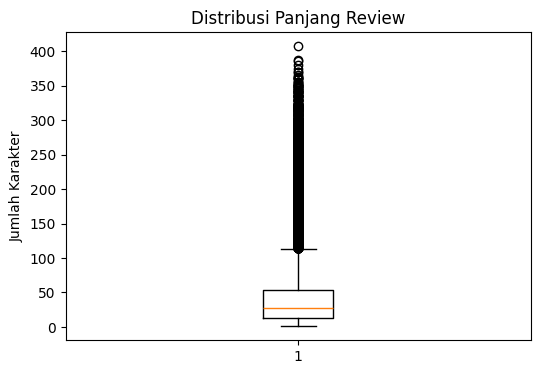

In [ ]:
# ====== Panjang Teks Review ======
# Hitung panjang teks dari kolom stemming_data
data['Review_len'] = data['stemming_data'].apply(lambda x: len(str(x)))
data.head()

# Visualisasi distribusi panjang review
plt.figure(figsize=(6, 4))
plt.boxplot(data['Review_len'])
plt.title('Distribusi Panjang Review')
plt.ylabel('Jumlah Karakter')
plt.show()

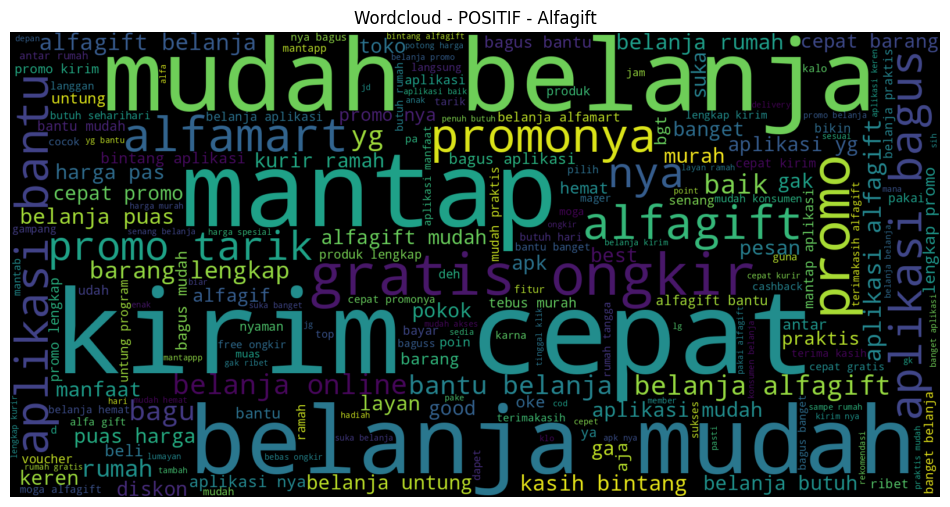


🔝 Top 10 kata positif untuk Alfagift:
belanja: 4900
mudah: 2912
aplikasi: 2815
alfagift: 2527
promo: 2181
cepat: 1754
kirim: 1734
bantu: 1560
bagus: 1492
rumah: 1246


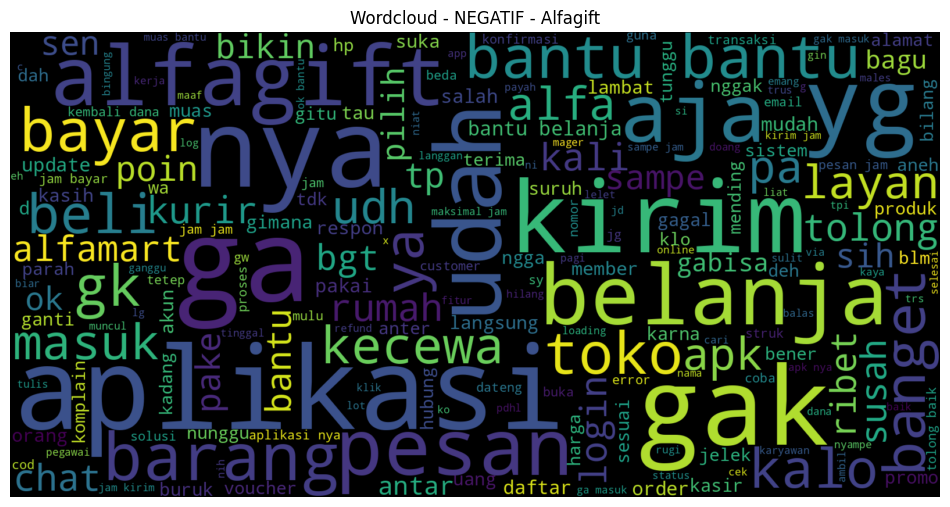


🔝 Top 10 kata negatif untuk Alfagift:
bantu: 712
aplikasi: 602
nya: 582
ga: 565
jam: 534
gak: 509
kirim: 498
belanja: 406
yg: 375
udah: 330


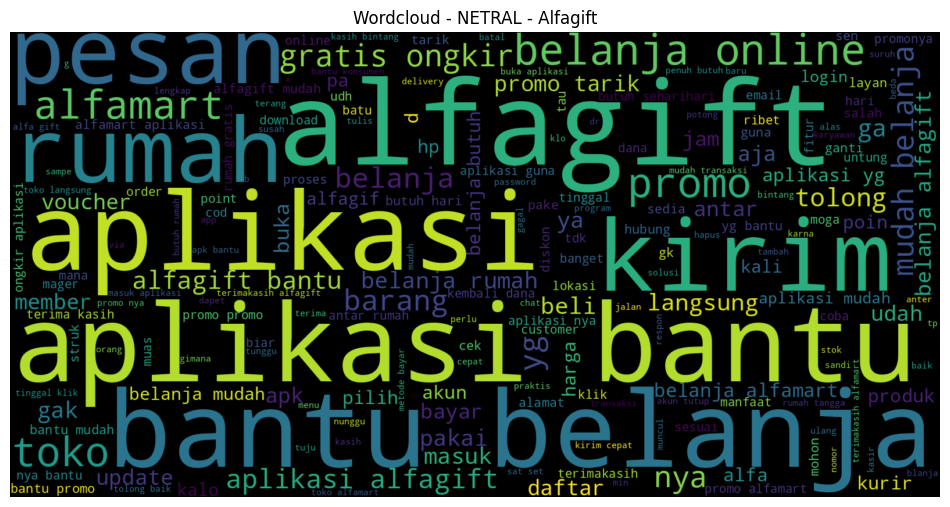


🔝 Top 10 kata netral untuk Alfagift:
belanja: 1192
aplikasi: 1065
bantu: 877
alfagift: 754
promo: 481
mudah: 465
rumah: 455
alfamart: 441
kirim: 300
yg: 299


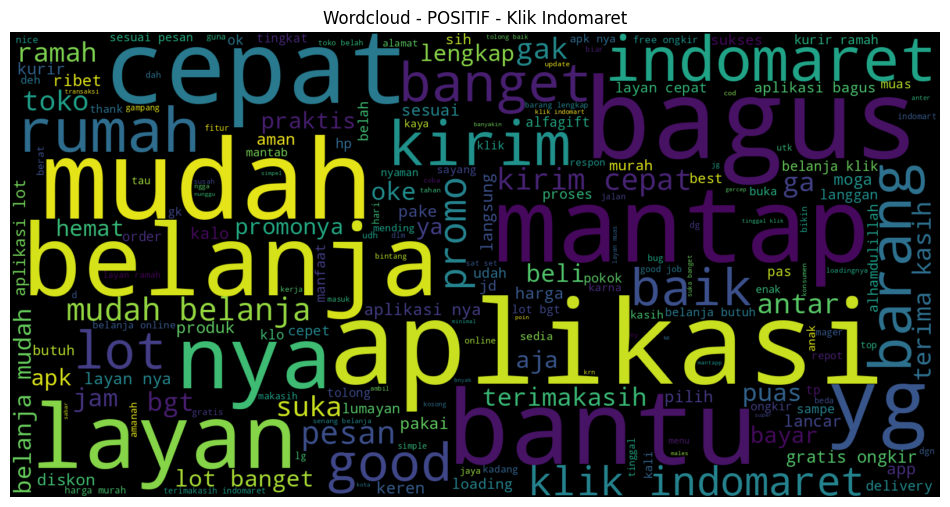


🔝 Top 10 kata positif untuk Klik Indomaret:
belanja: 379
mudah: 357
aplikasi: 347
cepat: 290
bagus: 273
layan: 224
indomaret: 224
nya: 219
mantap: 204
bantu: 198


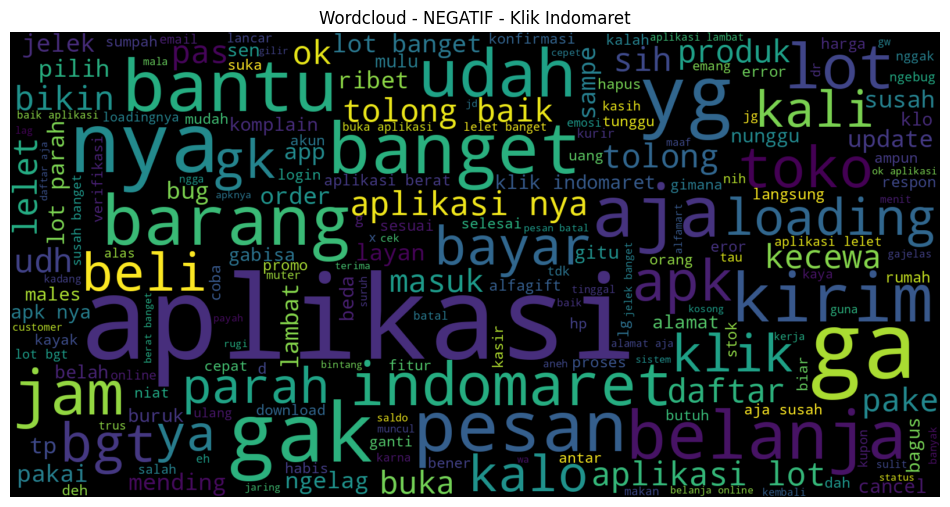


🔝 Top 10 kata negatif untuk Klik Indomaret:
aplikasi: 922
nya: 432
lot: 363
banget: 340
ga: 322
aja: 285
gak: 253
bantu: 232
yg: 231
pesan: 216


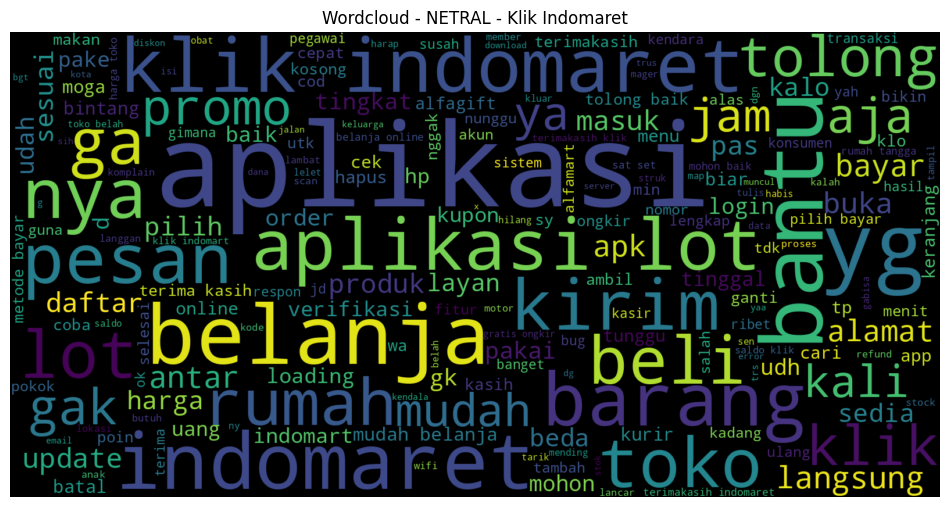


🔝 Top 10 kata netral untuk Klik Indomaret:
aplikasi: 326
indomaret: 194
klik: 176
lot: 154
belanja: 135
bantu: 124
yg: 120
toko: 92
barang: 85
kirim: 76


In [ ]:
# ====== Wordcloud per Sentimen per Aplikasi ======
from wordcloud import WordCloud
from collections import Counter

# Fungsi bantu untuk wordcloud dan 10 kata terbanyak
def show_wordcloud_and_top_words(text, sentiment_label, app_name):
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Wordcloud - {sentiment_label.upper()} - {app_name}")
    plt.show()

    # Frekuensi kata
    tokens = text.split()
    word_freq = Counter(tokens)
    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"\n🔝 Top 10 kata {sentiment_label} untuk {app_name}:")
    for word, freq in top_words:
        print(f"{word}: {freq}")

# Loop per aplikasi dan sentimen
for app in data['App'].unique():
    for sentiment in ['positif', 'negatif', 'netral']:
        subset = data[(data['App'] == app) & (data['sentiment'] == sentiment)]
        all_text = ' '.join(subset['stemming_data'].astype(str))
        if all_text.strip():  # Hanya tampilkan jika tidak kosong
            show_wordcloud_and_top_words(all_text, sentiment, app)

In [ ]:
# # ====== Distribusi Sentimen per Aplikasi ======
# plt.figure(figsize=(8, 5))
# sns.countplot(data=data, x='sentiment', hue='App', palette='Set2')
# plt.title('Distribusi Sentimen per Aplikasi')
# plt.xlabel('Sentimen')
# plt.ylabel('Jumlah Review')
# plt.show()

# SVM & KNN Model


=== Memproses aplikasi: Alfagift ===
🔍 GridSearch SVM...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
⏱ Waktu GridSearch SVM: 191.60 detik

--- Best Parameters for SVM ---
C: 100
gamma: 0.1
kernel: rbf
🧠 Training ulang SVM final (dengan probability)...
⏱ Waktu training SVM final: 89.26 detik
SVM AUC: 0.9339768388193632
SVM Accuracy: 0.8344495044200375

=== SVM Classification Report ===
              precision    recall  f1-score   support

     negatif       0.69      0.79      0.73       601
      netral       0.62      0.64      0.63       590
     positif       0.93      0.89      0.91      2542

    accuracy                           0.83      3733
   macro avg       0.75      0.77      0.76      3733
weighted avg       0.84      0.83      0.84      3733



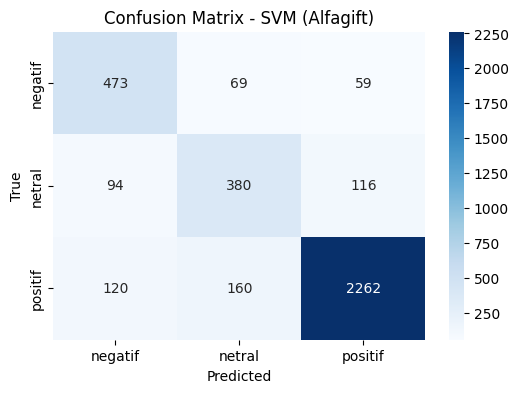

                                           Original_Text Predicted_Sentiment
9143                                      barang lengkap             positif
17062                     bagus skali klo casbeknya gede             positif
4309                       butuh lengkap kirim nya cepat             positif
5380   aplikasi bantu untung alfgift belanja mudah pr...             positif
7203                              manfaat belanja online              netral
...                                                  ...                 ...
7696                                               bagus             positif
6045        aplikasi mudah belanja alfagift kirim gratis              netral
9444   nyaman belanja butuh seharihari barang lengkap...             positif
9366      belanja mudah praktis aplikasi alfagift untung             positif
17091  gila sih antar banget pilih opsi antar maksima...             negatif

[3733 rows x 2 columns]
🧠 Training GridSearch KNN...
Fitting 3 folds for ea

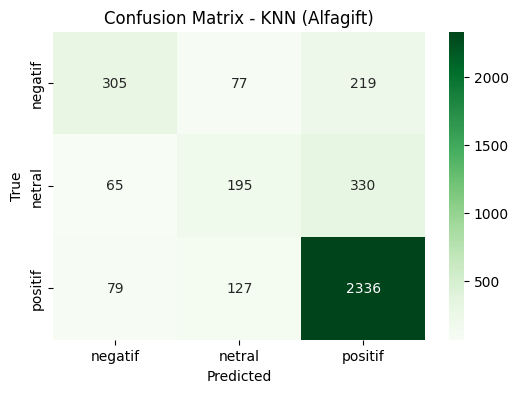

                                           Original_Text Predicted_Sentiment
9143                                      barang lengkap             positif
17062                     bagus skali klo casbeknya gede             negatif
4309                       butuh lengkap kirim nya cepat             positif
5380   aplikasi bantu untung alfgift belanja mudah pr...             positif
7203                              manfaat belanja online              netral
...                                                  ...                 ...
7696                                               bagus             positif
6045        aplikasi mudah belanja alfagift kirim gratis             positif
9444   nyaman belanja butuh seharihari barang lengkap...             positif
9366      belanja mudah praktis aplikasi alfagift untung             positif
17091  gila sih antar banget pilih opsi antar maksima...              netral

[3733 rows x 2 columns]
✅ Selesai untuk aplikasi: Alfagift


<ipython-input-44-7a9459581ef0>:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=accuracy_values, palette='pastel')


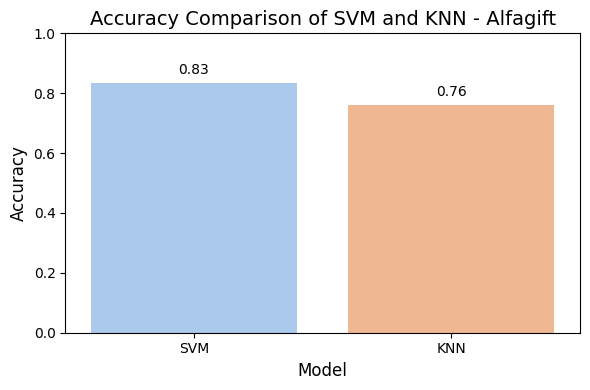

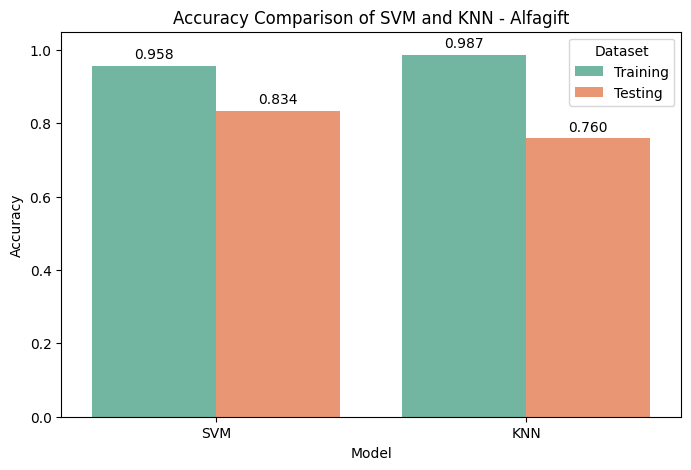

<ipython-input-44-7a9459581ef0>:207: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=svm_dist.index, y=svm_dist.values, palette='pastel', ax=axs[0])
<ipython-input-44-7a9459581ef0>:212: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=knn_dist.index, y=knn_dist.values, palette='muted', ax=axs[1])


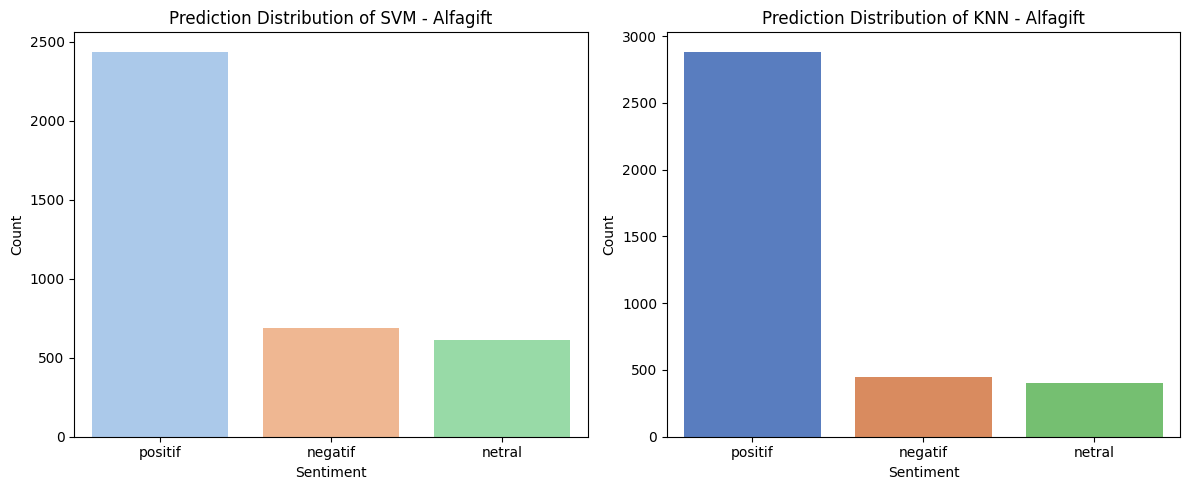

<ipython-input-44-7a9459581ef0>:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_svm_dist.index, y=train_svm_dist.values, palette='pastel', ax=axs[0])
<ipython-input-44-7a9459581ef0>:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_knn_dist.index, y=train_knn_dist.values, palette='muted', ax=axs[1])


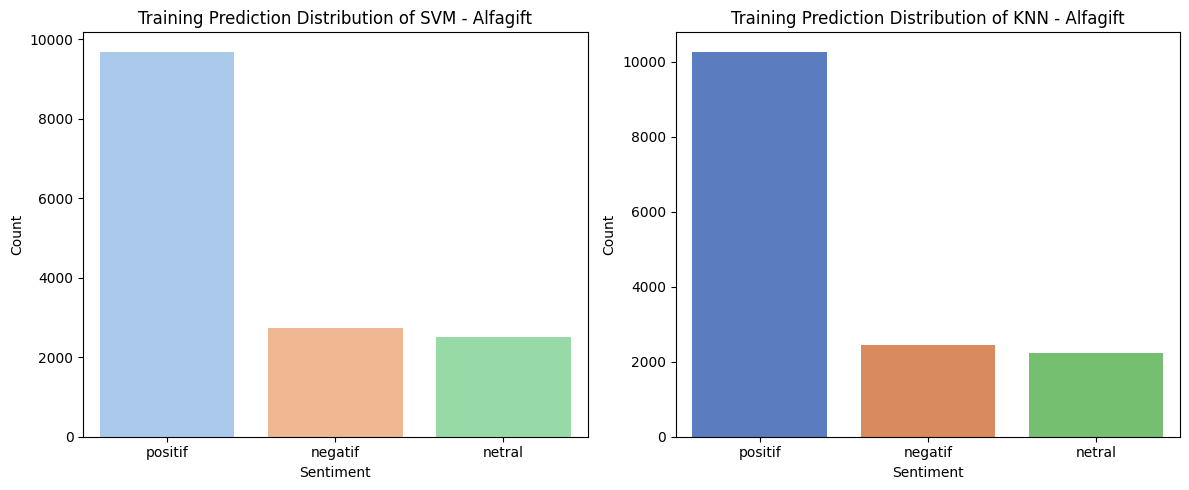

✅ Visualisasi selesai untuk aplikasi: Alfagift

=== Memproses aplikasi: Klik Indomaret ===
🔍 GridSearch SVM...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
⏱ Waktu GridSearch SVM: 17.13 detik

--- Best Parameters for SVM ---
C: 10
gamma: 0.1
kernel: rbf
🧠 Training ulang SVM final (dengan probability)...
⏱ Waktu training SVM final: 8.45 detik
SVM AUC: 0.897489230623098
SVM Accuracy: 0.7571569595261599

=== SVM Classification Report ===
              precision    recall  f1-score   support

     negatif       0.78      0.76      0.77       406
      netral       0.49      0.54      0.52       155
     positif       0.84      0.83      0.84       452

    accuracy                           0.76      1013
   macro avg       0.70      0.71      0.71      1013
weighted avg       0.76      0.76      0.76      1013



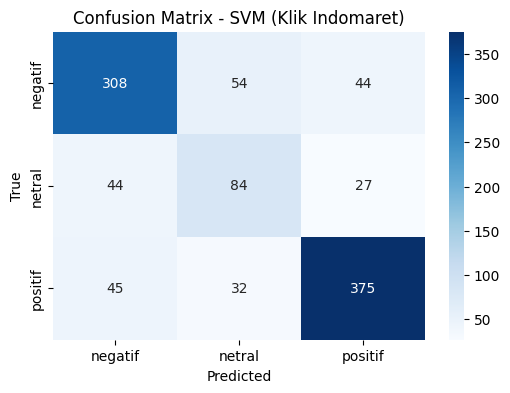

                                          Original_Text Predicted_Sentiment
33                                                 good             positif
2858  coba upgrade deh aplikasi berat banget pas buk...             negatif
3169  minkenapa akun klik indomaret ga connect nomor...              netral
1921                                                okk             positif
4342                                 suka ngelag ngelag             negatif
...                                                 ...                 ...
1010                                       aplikasi lot              netral
4181  pesan nyasar org lapor ga urus udh nlpn cs apl...             negatif
214   indomaret tlg edukasi karyawan nya selesai bel...             negatif
3424  bang developer inti aplikasi diupgrade kayak c...             negatif
2702                             layan emas cepat kirim             positif

[1013 rows x 2 columns]
🧠 Training GridSearch KNN...
Fitting 3 folds for each of 6 cand

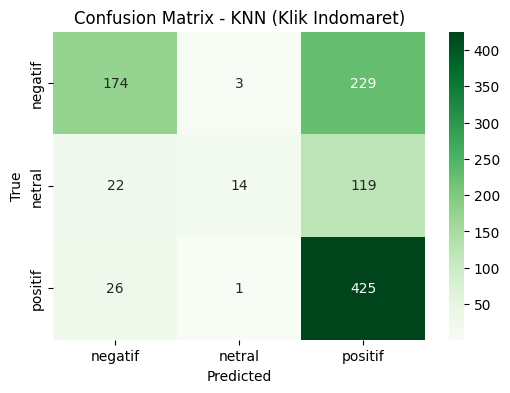

                                          Original_Text Predicted_Sentiment
33                                                 good             positif
2858  coba upgrade deh aplikasi berat banget pas buk...             positif
3169  minkenapa akun klik indomaret ga connect nomor...             positif
1921                                                okk             positif
4342                                 suka ngelag ngelag             negatif
...                                                 ...                 ...
1010                                       aplikasi lot              netral
4181  pesan nyasar org lapor ga urus udh nlpn cs apl...             positif
214   indomaret tlg edukasi karyawan nya selesai bel...             negatif
3424  bang developer inti aplikasi diupgrade kayak c...             positif
2702                             layan emas cepat kirim             positif

[1013 rows x 2 columns]
✅ Selesai untuk aplikasi: Klik Indomaret


<ipython-input-44-7a9459581ef0>:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=accuracy_values, palette='pastel')


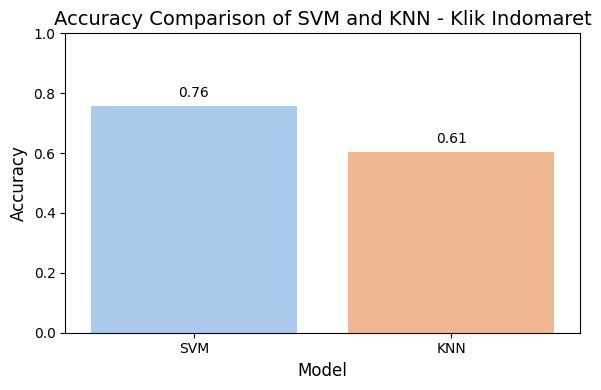

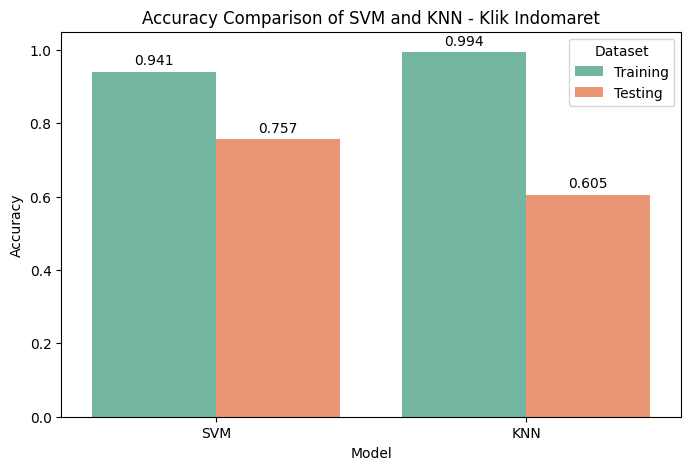

<ipython-input-44-7a9459581ef0>:207: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=svm_dist.index, y=svm_dist.values, palette='pastel', ax=axs[0])
<ipython-input-44-7a9459581ef0>:212: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=knn_dist.index, y=knn_dist.values, palette='muted', ax=axs[1])


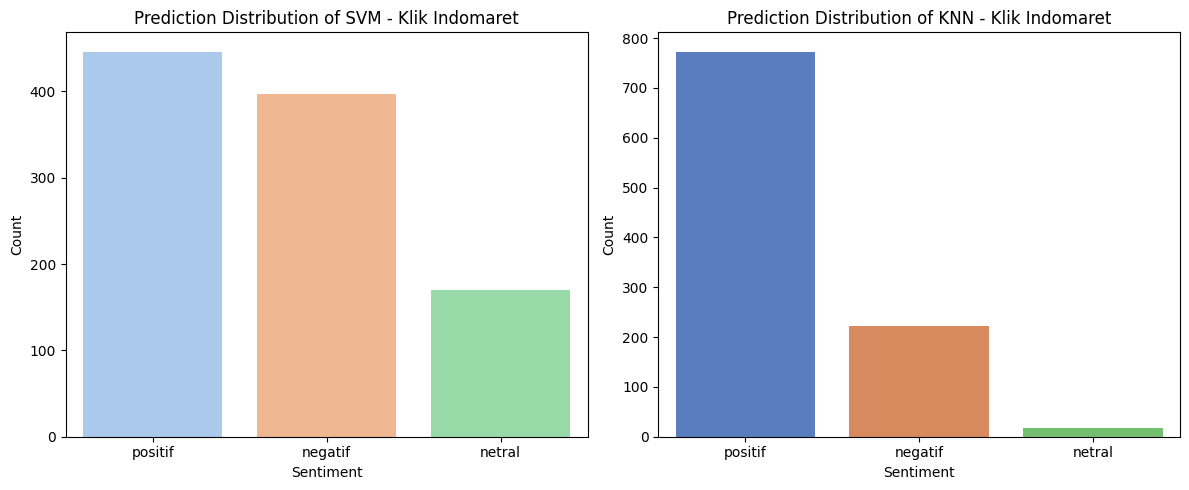

<ipython-input-44-7a9459581ef0>:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_svm_dist.index, y=train_svm_dist.values, palette='pastel', ax=axs[0])
<ipython-input-44-7a9459581ef0>:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_knn_dist.index, y=train_knn_dist.values, palette='muted', ax=axs[1])


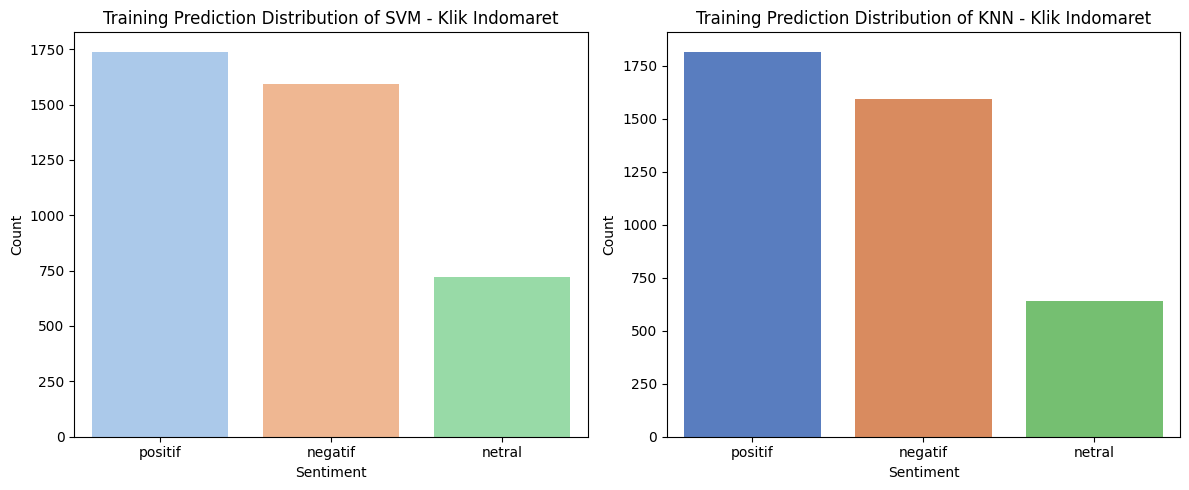

✅ Visualisasi selesai untuk aplikasi: Klik Indomaret


In [ ]:
import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

base_path = '/content/gdrive'
apps = ['Alfagift', 'Klik Indomaret']

for app in apps:
    print(f"\n=== Memproses aplikasi: {app} ===")
    file_path = os.path.join(base_path, f'Hasil-labeling-{app.replace(" ", "_")}.csv')
    data = pd.read_csv(file_path)

    # Preprocessing
    data = data.dropna(subset=['stemming_data', 'sentiment'])
    data = data[data['stemming_data'].astype(str).str.strip() != '']
    X = data['stemming_data'].astype(str)
    y = data['sentiment']

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=3000)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # ========== SVM (Optimized) ==========
    svm_params = {
        'C': [1, 10, 100],
        'gamma': [0.1, 0.01],
        'kernel': ['rbf']
    }

    print("🔍 GridSearch SVM...")
    start = time.time()
    grid_svm = GridSearchCV(
        estimator=SVC(random_state=0, class_weight='balanced'),
        param_grid=svm_params,
        n_jobs=-1,
        scoring='accuracy',
        cv=3,
        verbose=1
    )
    grid_svm.fit(X_train_tfidf, y_train_enc)
    end = time.time()
    print(f"⏱ Waktu GridSearch SVM: {end - start:.2f} detik")

    print("\n--- Best Parameters for SVM ---")
    for param in svm_params:
        print(f"{param}: {grid_svm.best_params_[param]}")

    print("🧠 Training ulang SVM final (dengan probability)...")
    start = time.time()
    svm_final = SVC(
        C=grid_svm.best_params_['C'],
        gamma=grid_svm.best_params_['gamma'],
        kernel='rbf',
        probability=True,
        class_weight='balanced',
        random_state=0
    )
    svm_final.fit(X_train_tfidf, y_train_enc)
    end = time.time()
    print(f"⏱ Waktu training SVM final: {end - start:.2f} detik")

    y_pred_svm_enc = svm_final.predict(X_test_tfidf)
    y_pred_svm = le.inverse_transform(y_pred_svm_enc)
    y_proba_svm = svm_final.predict_proba(X_test_tfidf)
    auc_svm = roc_auc_score(y_test_enc, y_proba_svm, multi_class='ovr', average='macro')

    print("SVM AUC:", auc_svm)
    print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
    print("\n=== SVM Classification Report ===")
    print(classification_report(y_test, y_pred_svm))

    # Confusion Matrix SVM
    cm_svm = confusion_matrix(y_test, y_pred_svm, labels=le.classes_)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - SVM ({app})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Save predictions
    pred_svm_df = pd.DataFrame({'Original_Text': X_test, 'Predicted_Sentiment': y_pred_svm})
    print(pred_svm_df)
    pred_svm_df.to_csv(os.path.join(base_path, f'Prediksi_SVM_{app.replace(" ", "_")}.csv'), index=False)

    # ========== KNN (Optimized) ==========
    print("🧠 Training GridSearch KNN...")
    scaler = StandardScaler(with_mean=False)
    X_train_scaled = scaler.fit_transform(X_train_tfidf)
    X_test_scaled = scaler.transform(X_test_tfidf)

    knn_params = {
        'n_neighbors': [5, 11, 21],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean'],
        'leaf_size': [30],
        'p': [2]
    }

    start = time.time()
    grid_knn = GridSearchCV(
        estimator=KNeighborsClassifier(),
        param_grid=knn_params,
        n_jobs=-1,
        cv=3,
        scoring='accuracy',
        verbose=1
    )
    grid_knn.fit(X_train_scaled, y_train_enc)
    end = time.time()
    print(f"⏱ Waktu training KNN: {end - start:.2f} detik")

    print("\n--- Best Parameters for KNN ---")
    for param in knn_params:
        print(f"{param}: {grid_knn.best_params_[param]}")

    y_pred_knn_enc = grid_knn.predict(X_test_scaled)
    y_pred_knn = le.inverse_transform(y_pred_knn_enc)
    y_proba_knn = grid_knn.predict_proba(X_test_scaled)
    auc_knn = roc_auc_score(y_test_enc, y_proba_knn, multi_class='ovr', average='macro')

    print("KNN AUC:", auc_knn)
    print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
    print("\n=== KNN Classification Report ===")
    print(classification_report(y_test, y_pred_knn))

    # Confusion Matrix KNN
    cm_knn = confusion_matrix(y_test, y_pred_knn, labels=le.classes_)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - KNN ({app})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Save predictions
    pred_knn_df = pd.DataFrame({'Original_Text': X_test, 'Predicted_Sentiment': y_pred_knn})
    print(pred_knn_df)
    pred_knn_df.to_csv(os.path.join(base_path, f'Prediksi_KNN_{app.replace(" ", "_")}.csv'), index=False)

    print(f"✅ Selesai untuk aplikasi: {app}")

    # === AKURASI PREDIKSI ===
    akurasi_svm = accuracy_score(y_test, y_pred_svm)
    akurasi_knn = accuracy_score(y_test, y_pred_knn)

    plt.figure(figsize=(6, 4))
    accuracy_values = [akurasi_svm, akurasi_knn]
    model_names = ["SVM", "KNN"]

    ax = sns.barplot(x=model_names, y=accuracy_values, palette='pastel')
    plt.title(f"Accuracy Comparison of SVM and KNN - {app}", fontsize=14)
    plt.ylabel("Accuracy", fontsize=12)
    plt.xlabel("Model", fontsize=12)
    plt.ylim(0, 1)

    for i, acc in enumerate(accuracy_values):
        ax.text(i, acc + 0.02, f"{acc:.2f}", ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    # === AKURASI TRAINING ===
    y_train_pred_svm_enc = grid_svm.predict(X_train_tfidf)
    y_train_pred_svm = le.inverse_transform(y_train_pred_svm_enc)

    y_train_pred_knn_enc = grid_knn.predict(X_train_scaled)
    y_train_pred_knn = le.inverse_transform(y_train_pred_knn_enc)

    akurasi_train_svm = accuracy_score(y_train, y_train_pred_svm)
    akurasi_train_knn = accuracy_score(y_train, y_train_pred_knn)

    # === Visualisasi Training vs Testing ===
    plt.figure(figsize=(8, 5))
    model_names = ['SVM', 'KNN']
    train_scores = [akurasi_train_svm, akurasi_train_knn]
    test_scores = [akurasi_svm, akurasi_knn]

    df_scores = pd.DataFrame({
        'Model': model_names * 2,
        'Akurasi': train_scores + test_scores,
        'Dataset': ['Training'] * 2 + ['Testing'] * 2
    })

    ax = sns.barplot(data=df_scores, x='Model', y='Akurasi', hue='Dataset', palette='Set2')
    plt.title(f'Accuracy Comparison of SVM and KNN - {app}')
    plt.ylim(0, 1.05)
    plt.ylabel('Accuracy')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

    plt.show()

    # === Distribusi Prediksi Testing ===
    svm_dist = pred_svm_df['Predicted_Sentiment'].value_counts()
    knn_dist = pred_knn_df['Predicted_Sentiment'].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    sns.barplot(x=svm_dist.index, y=svm_dist.values, palette='pastel', ax=axs[0])
    axs[0].set_title(f'Prediction Distribution of SVM - {app}')
    axs[0].set_ylabel('Count')
    axs[0].set_xlabel('Sentiment')

    sns.barplot(x=knn_dist.index, y=knn_dist.values, palette='muted', ax=axs[1])
    axs[1].set_title(f'Prediction Distribution of KNN - {app}')
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel('Sentiment')

    plt.tight_layout()
    plt.show()

    # === Distribusi Prediksi Training ===
    train_svm_dist = pd.Series(y_train_pred_svm).value_counts()
    train_knn_dist = pd.Series(y_train_pred_knn).value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    sns.barplot(x=train_svm_dist.index, y=train_svm_dist.values, palette='pastel', ax=axs[0])
    axs[0].set_title(f'Training Prediction Distribution of SVM - {app}')
    axs[0].set_ylabel('Count')
    axs[0].set_xlabel('Sentiment')

    sns.barplot(x=train_knn_dist.index, y=train_knn_dist.values, palette='muted', ax=axs[1])
    axs[1].set_title(f'Training Prediction Distribution of KNN - {app}')
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel('Sentiment')

    plt.tight_layout()
    plt.show()

    print(f"✅ Visualisasi selesai untuk aplikasi: {app}")